# Week1 One-way ANOVA

## 背景描述

为了调查吃巧克力对心血管健康的影响，实验由三种类型的巧克力组成：

100g的黑巧克力，含有200mg全脂牛奶的100g黑巧克力和200g的牛奶巧克力。

12个实验对象：7女5男。在不同的天数里，每个实验对象将吃一种类型的巧克力，一个小时后测量他们血浆的总抗氧能力。 

这是一个因子水平数 𝑎 = 3 和重复次数 m = 12 的单因子实验

## 数据描述

数据集包含巧克力的种类，血浆浓度的数据

In [1]:
import pandas as pd
df=pd.read_csv('C:\\Users\\asus\\Desktop\\HW1\\Project1.csv')
df

,Obs,Chocolate,Capacity
0,1,1,118.8
1,2,1,122.6
2,3,1,115.6
3,4,1,113.6
4,5,1,119.5
5,6,1,115.9
6,7,1,115.8
7,8,1,115.1
8,9,1,116.9
9,10,1,115.4


| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Chocolate | 巧克力类型 | categorical variable | [1, 2, 3] |
| （因变量）Capacity | 血浆浓度 | continuous variable | $\mathbb{R}$ |

## 问题 
注：这里使用 $\alpha=0.05$ 的显著性水平
1. 试用两样本t检验两两比较 3 种巧克力对心血管健康的影响是否存在差异.
2. 试使用One-way ANOVA判断食用的 3 种巧克力对心血管健康的影响是否有差异.
3. 试判断该实验用One-way ANOVA模型是否恰当.
4. 估计食用这 3 种巧克力 1h 后血浆的总抗氧能力均值和误差的方差.

## 解决方案

In [2]:
#导入所需库
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import math
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

#显著性水平
alpha = 0.05
#因子
a = 3
#水平
m = 12

#提取所需要的列
df = df[['Chocolate','Capacity']]
#构建根据不同种类区分的group
data = df.values 
Group = [data[data[:,0] == atype,1] for atype in [1, 2, 3]]

### Q1: 试用两样本t检验两两比较 3 种巧克力对心血管健康的影响是否存在差异.

两种方法，拒绝域法和p值法

1. 类型 1 , 2 进行两样本t检验

In [3]:
# 得到t值和p值
t1, p1 = stats.ttest_ind(Group[0], Group[1])

# 拒绝域法
t_val = t.ppf(1 - alpha / 2, 2 * (m - 1))#自由度为2*(m-1)的t分布的alpha分位数
if abs(t1) > abs(t_val):
    print('t1 =', t1,'  t =', t_val , ', 拒绝 H0.')
else:
    print('接受 H0.') 

# p值法
if p1 < alpha:
    print('p1 =',p1, '< 0.05, 拒绝 H0')
else:
    print('接受 H0') 

t1 = 11.10565260090929   t = 2.0738730679040147 , 拒绝 H0.
p1 = 1.7330939682091152e-10 < 0.05, 拒绝 H0


故拒绝原假设，认为类型1与类型2巧克力对心血管健康的影响存在显著差异

2. 类型 2 , 3 进行两样本t检验

In [4]:
# 得到t值和p值
t2, p2 = stats.ttest_ind(Group[1], Group[2])

# 拒绝域法
t_val = t.ppf(1 - alpha / 2, 2 * (m - 1))#自由度为2*(m-1)的t分布的alpha分位数
if abs(t2) > abs(t_val):
    print('t2 =', t2,'  t =', t_val , ', 拒绝 H0.')
else:
    print('接受 H0.') 

# p值法
if p2 < alpha:
    print('p2 =',p2, '< 0.05, 拒绝 H0')
else:
    print('接受 H0') 

接受 H0.
接受 H0


故接受原假设，认为类型2与类型3巧克力对心血管健康的影响不存在差异

3. 类型1 ，3进行两样本t检验

In [5]:
# 得到t值和p值
t3, p3 = stats.ttest_ind(Group[0], Group[2])

# 拒绝域法
t_val = t.ppf(1 - alpha / 2, 2 * (m - 1))#自由度为2*(m-1)的t分布的alpha分位数
if abs(t3) > abs(t_val):
    print('t3 =', t3,'  t =', t_val , ', 拒绝 H0.')
else:
    print('接受 H0.') 

# p值法
if p3 < alpha:
    print('p-value =',p3, '< 0.05, 拒绝 H0')
else:
    print('接受 H0') 

t3 = 12.047774079768462   t = 2.0738730679040147 , 拒绝 H0.
p-value = 3.6833891525708707e-11 < 0.05, 拒绝 H0


故拒绝原假设，认为类型1与类型3巧克力对心血管健康的影响存在显著差异

综上，类型2与类型3巧克力对心血管健康的影响不存在差异，类型1与类型3巧克力和类型1与类型2巧克力对心血管健康的影响存在显著差异

### Q2: 试使用One-way ANOVA判断食用的 3 种巧克力对心血管健康的影响是否有差异.
检验假设 $H_0: \mu_1 = \mu_2 = \mu_3 $ ;  $H_1: \mu_1, \mu_2, \mu_3$不全相等

两种方法：F统计量法和p值法

In [6]:
# 绘制方差分析表
model = ols('Capacity ~ C(Capacity)', df).fit()
anovaResults = round(anova_lm(model), 3)
print('\n方差分析表: \n', anovaResults)  
    
F0, p0 = stats.f_oneway(Group[0], Group[1], Group[2]) 
    
# F统计量法：
F = f.ppf(1 - alpha, dfn = a - 1, dfd = a * (m - 1))
if F0 > F:
    print('\n F0 =', F0,'> F(0.05,2,33) =',F, ', 拒绝 H0.')
else:
    print('\接受 H0.') 
    
# p值法：
if p0 < alpha:
    print('\np-value =', p0, '< 0.05, 拒绝 H0.')
else:
    print('\n接受 H0.') 


方差分析表: 
                df   sum_sq  mean_sq             F  PR(>F)
C(Capacity)  32.0  2296.95    71.78  5.530639e+26     0.0
Residual      3.0     0.00     0.00           NaN     NaN

 F0 = 93.57559776071176 > F(0.05,2,33) = 3.2849176510382883 , 拒绝 H0.

p-value = 2.5152590041683006e-14 < 0.05, 拒绝 H0.


由方差分析表可知，P值小于 0.05 且F值大于 3.285，故拒绝原假设，即食用的 3 种巧克力对心血管健康的影响存在差异。

###  Q3: 试判断该实验用One-way ANOVA模型是否恰当.
  
单因子方差分析的基本假定有3个，分别是：

1.正态性：第i个水平下的数据$y_{i1},y_{i2},...$是来自正态总体$N(\mu{i},\sigma{i}^2)$的一个样本

2.等方差性：a个方差相同

3.独立性：个数据$y{ij}$都相互独立

故要判断该实验用One-way ANOVA模型是否恰当需要进行正态性检验、方差齐性检验和独立性检验

#### 1. 正态性检验

##### 法1： qq图

利用qq图（The quantitle-quantile plot），来检验数据分布的相似性。令X轴为正态分布的分位数，Y轴为样本分位数，如果这两者构成的点分布在一条直线上，就证明样本数据与正态分布存在线性相关性，即服从正态分布。

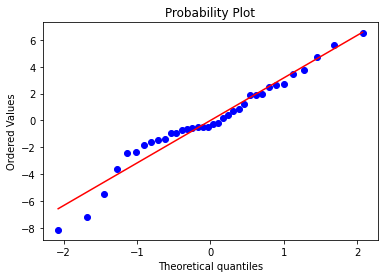

In [7]:
# 用qq图进行正态性检验
data_res = data * 1

for k in [1,2,3]:
    groups = data_res[data_res[:,0] == k,1]
    data_res[data_res[:,0] == k,1] = groups - np.mean(groups)

res = data_res[:, 1]

res = res.astype(float) * 1
stats.probplot(res, dist = 'norm', plot = plt)
plt.show()

从图中可以看到，整体上误差分布是近似正态的

##### 法2：利用Shapiro-Wilk检验
SW检验有两个基本假设，H0：样本中所有来自总体分布服从正态分布 H1：样本中所有来自总体分布不服从正态分布
利用方法stats.shapiro()检验正态性，输出结果中第一个为统计量，第二个为P值（统计量越接近 1 越表明数据和正态分布拟合的好，P值大于指定的显著性水平，接受原假设，认为样本来自服从正态分布的总体）

In [8]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal1 = stats.shapiro(res)
print(SW)
print(pVal1)

if pVal1 > alpha:
    print('\n接受H0')
else:
    print('\np-value < 0.05, 拒绝H0') 

0.9625394940376282
0.2571522891521454

接受H0


由上述分析可知，统计量约为 0.96，接近 1；且P值约为 0.26，大于指定的显著性水平 0.05。故认为残差来自服从正态分布的总体。

#### 2. 方差齐性检验

##### 法1： Bartlett检验

Bartlett检验的核心思想是通过求取不同组之间的卡方统计量，然后根据卡方统计量的值来判断组间方差是否相等。该方法极度依赖于数据是正态分布，如果数据非正态分布，则的出来的结果偏差很大。  
Bartlett检验统计量为：
$$\chi_0^2 = 2.3026\frac{q}{c}$$
其中，
$$q = (N - a)log_{10}S_p^2 - \sum_{i=1}^a(n_i - 1)log_{10}S_i^2$$

$$c = 1 + \frac{1}{3(a-1)}(\sum_{i=1}^a(n_i-1)^{-1} - (N - a)^{-1})$$

$$S_p^2 = \frac{\sum_{i=1}^a\quad(n_i-1)S_i^2}{N - a}$$ 且$S_i^2$是第 $i$ 个总体的样本方差；当$\chi_0^2 > \chi_{\alpha,a-1}^2$ 时，拒绝$H_0$，其中$\chi_{\alpha,a-1}^2$是自由度为$a-1$的卡方分布上的 $\alpha$ 分位数。

In [9]:
# 用Bartlett检验进行方差齐性检验
bart, pVal2 = stats.bartlett(Group[0], Group[1], Group[2])
bart_stat = stats.chi2.isf(alpha, a-1)

# p值检验
print('Bartlett检验的P值为：', pVal2)
if pVal2 < alpha:
    print('p-value < 0.05, 拒绝 H0.')
else:
    print('接受 H0')  

# Bartlett检验统计量检验
print('Bartlett检验统计量：', round(bart, 2))
print('𝜒_(𝛼,𝑎−1)^2: ', round(bart_stat, 2))
if bart > bart_stat:
    print('𝜒_0^2 > 𝜒_(𝛼,𝑎−1)^2, 拒绝 H0.')
else:
    print('接受 H0')  

Bartlett检验的P值为： 0.8086822761266198
接受 H0
Bartlett检验统计量： 0.42
𝜒_(𝛼,𝑎−1)^2:  5.99
接受 H0


由分析可知，Bartlett检验的P值大于 0.05 且Bartlett检验统计量小于5.99，故接受原假设，即残差具有方差齐性。 

##### 法2：Levene检验
Levene检验是将每个值先转换为该值与其组内均值的偏离程度，然后再用转换后的偏离程度去做方差分析，即组间方差/组内方差。修正后的Levene检验中的均值采用中位数的计算方法，因此这里的偏差用每个处理的观测值$y_{ij}$与该处理中的中位数$\tilde{y}_{i·}$的偏差的绝对值来表示：$d_{ij} = |y_{ij} - \tilde{y}_{i·}|, i = 1,2,···,a;j = 1,2,···,n$

In [10]:
# 用Levene检验进行方差齐性检验
lene, pVal3 = stats.levene(Group[0], Group[1], Group[2])
print('Levene检验的P值为：', pVal3)
if pVal3 < alpha:
    print('p-value < 0.05, 拒绝 H0.')
else:
    print('接受 H0')  

Levene检验的P值为： 0.9789607652073091
接受 H0


由分析可知，Levene检验的P值大于 0.05，故残差具有方差齐性。

#### 3. 独立性检验
Durbin-Watson 检验，又称 DW 检验，是用来检验回归分析中残差的一阶自相关性的(尤其针对时间序列数据)。在本实验中，数据不是时间序列数据，但也可以进行检验
各残差的相关性方程为：$e_i = \rho * e_{i-1} + v_i$，检验的原假设为：$\rho = 0$，备择假设为：$\rho \neq 0$  
检验统计量为：$d = \frac{\sum^T_{t=2}\quad(e_i-e_{i-1})^2}{\sum^T_{t=1}\quad e_i^2}$  
由于d近似等于2(1-$\rho$),该统计量值越接近 2 越好，一般在 1~3 之间说明没问题，小于 1 这说明残差存在自相关性（有临界值表可以查）。  
若没有通过 DW 检验，则需要修改模型或对数据进行处理。

In [11]:
# 用Durbin-Watson检验进行独立性检验
def durbin_watson(residuals):
    nume = sum(np.diff(residuals.T) ** 2)
    deno = sum(residuals ** 2)
    return nume / deno
dw = durbin_watson(res)
print('Durbin-Watson检验的统计量为：',dw)

Durbin-Watson检验的统计量为： 2.299061678853025


Durbin-Watson检验的统计量约为：2.3，非常接近2，在 1~3 之间，故没有违反独立性的假定。 

综上三个方面，可以知道该实验用One-way ANOVA模型是恰当的

### Q4: 估计 3 个饮食方式水平下的均值和误差的方差.

估计 $\mu_i$ 和 $\sigma^2$

各水平均值$\mu_i$的估计为$y{i}$的均值

误差方差$\sigma^2$的估计为sse/a(m-1)

In [12]:
mu = [round(np.mean(Group[i]), 3) for i in range(a)]
print('3 个饮食方式水平下的均值：{0}'.format(mu))

sse = 0
list_type=[1,2,3]
for i in range(a):
    se = 0
    list_ = data[data[:,0] == list_type[i],1]
    for j in range(m):
        se += (list_[j] - mu[i]) ** 2
    sse += se
var = round(sse / (a * (m - 1)),2) 
print('3 个饮食方式水平下的误差的方差：{0}'.format(var))

3 个饮食方式水平下的均值：[116.058, 100.7, 100.183]
3 个饮食方式水平下的误差的方差：10.43


由上述分析可知，食用这 3 种巧克力 1h 后血浆的总抗氧能力均值的估计值分别为：116.058, 100.7, 100.183 
其方差的估计值为：10.43